<a href="https://colab.research.google.com/github/Jescas981/Deep-Learning-TF2/blob/main/00_MachineLearning_and_Neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What's Machine Learning?
People might look Machine Learning as something **magical, complex, fancy** and futuristic. It is almost all of them, but it's not **magical** at all. It requires a background math and spatial reasoning to understand how a model works

Common Answer: Machine Learning can be expressed as automating and improving the learning process of computers based on their experience without any human assitance.

Dumb Answer (But it's definition is more exact): The answer above doesn't tell us how Machine Learning works, it just say common stuffs that we can search on internet. Machine Learning involves spacial reasoning because it is just be a  a geometrical problem.

## 1. Linear Regression Problem

### 1.1 Linear Regression
Let's think that we want to know how a salary is related to years of experience, we can use a line to fit the data.

\begin{align}
y = wx + b
\end{align}

Where:
+ $y$ : Target
+ $w$: Weight (Slope)
+ $b$: Bias

To fit the data we need to calculate the parameters $w$ and $b$ to modify our model predictions.

**How we can do this in the real world?**
We need to follow these steps:
+ Collect bunch of data $(x_1,y_1)...(x_n,y_n)$
+ Draw all points as dots in their corresponding coordinates
+ Draw a line through the dots

The last step defines what Machine Learning does, we create a model that fits data using a geometrical approach.

**Note**: This data is not real, is only for learning purposes

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Paramaters
weight = 1.5
bias = 1.25

# Fake linear data
X = np.arange(start=0,
              stop=20,
              step=0.1)

# Calculate predictions
np.random.seed(43)
y = weight * X + bias + np.random.random(len(X)) * 8 # Noise

linear_df = pd.DataFrame({'Years': X,
                          'Salary': y})
linear_df.head(10)

,Years,Salary
0,0.0,2.170437
1,0.1,6.272532
2,0.2,2.617128
3,0.3,3.624717
4,0.4,4.467112
5,0.5,8.873100
6,0.6,7.478722
7,0.7,6.629298
8,0.8,2.682111
9,0.9,8.469986


Text(0, 0.5, 'Salary (K USD)')

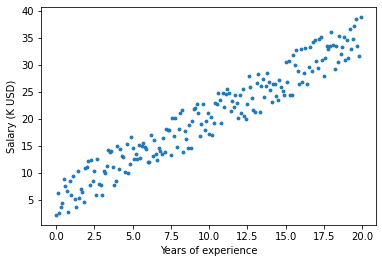

In [ ]:
plt.scatter(X,y,s=8)
plt.xlabel('Years of experience')
plt.ylabel('Salary (K USD)')

### 1.2 Multiple Linear Regression
It's similar to a  simple Linear Regression, except the it involves more input feaetures like:
+ Years of experience
+ Phd
+ Bachelors
+ Age
+ School
When we have more input features in our model, it could improve our model predictions. In this example the Phd, Bachelor, School can affect the Salary of a person.

If we have more than two features we won't be able to visualize at all our model because we can't visualize up to the third dimension.

**Note**: This data is not real, is only for learning purposes

In [ ]:
# Paramaters
weight1 = 1.5
bias1 = 1.25

weight2 = 0.3
bias2 = 20

# Fake linear data
X1 = np.arange(start=0,
              stop=20,
              step=0.1) +  + np.random.random(200) * 8

X2 = np.arange(start=20,
              stop=60,
              step=0.2) +  + np.random.random(200) * 10

np.random.seed(43)

# Calculate predictions
y = (weight1 * X1 + bias1) +(weight2 * X2 + bias2)

linear_df = pd.DataFrame({'Years': X1,
                          'Age': X2,
                          'Salary': y})
linear_df.head(10)

,Years,Age,Salary
0,7.914428,21.640316,39.613736
1,7.452617,28.626721,41.016941
2,7.003886,28.181038,40.210140
3,4.249542,26.228000,35.492713
4,4.148932,29.928311,36.451892
5,4.971622,30.157684,37.754739
6,1.455218,29.722659,32.349624
7,7.889897,23.005638,39.986537
8,5.721178,24.887612,37.298050
9,8.836367,26.689339,42.511352


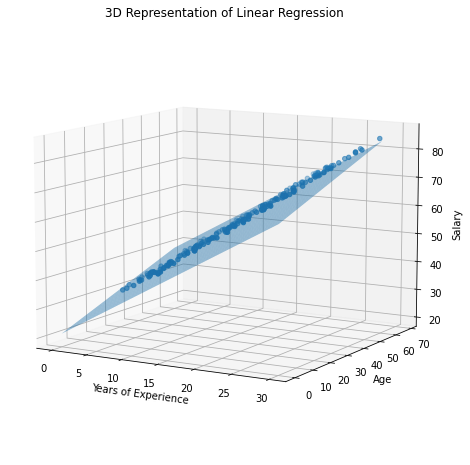

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X1,X2,y)
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
ax.view_init(10,-60)
ax.set_title('3D Representation of Linear Regression')
# # Draw plane
xx, yy = np.meshgrid(np.linspace(0,30), np.linspace(0,60))
zz = (weight1 * xx + bias1) + (weight2 * yy + bias2)
ax.plot_surface(xx ,yy ,zz ,alpha=0.5)

## 2. Binary Classification
Binary Classification consists into classify if multiple input features belongs a to class or another one.

The output of this type of model is binary only 0 or 1. 

Eg. Dog vs Cat, Spam vs Not Spam, etc

In [ ]:
np.random.seed(40)

X1 = np.arange(start=4, stop=6, step=0.05) + np.random.randn(40)
X1 = np.expand_dims(X1[::-1],axis=1)
X2 = np.expand_dims(np.arange(start=150, stop=310, step=4) + np.random.randn(40) * 5 ,axis=1)
length = int(len(X1)/2)
Y = np.expand_dims(np.concatenate([np.ones(length), np.zeros(length)]),axis=1)

data = np.hstack([X1,X2,Y])

# Reproducible random
np.random.seed(43)

# Move data randomly
np.random.shuffle(data)

X1 = data[:,0]
X2 = data[:,1]
Y = data[:,2]

bin_class_df = pd.DataFrame({'Height': X1,
                             'Weight': X2,
                             'At risk?': Y})
bin_class_df.head(10)

,Height,Weight,At risk?
0,5.293494,223.366989,1.0
1,6.850679,196.460424,1.0
2,4.616307,254.438936,0.0
3,5.110267,275.017609,0.0
4,4.753830,181.205514,1.0
5,5.216571,174.044947,1.0
6,2.355599,290.862745,0.0
7,5.527712,189.481388,1.0
8,3.675016,232.714408,0.0
9,3.415394,297.642650,0.0


We use a line to separate and classify the data

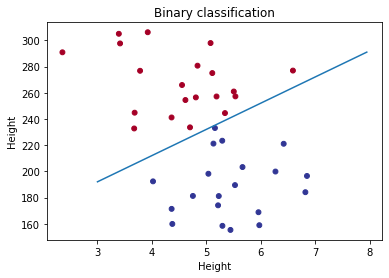

In [ ]:
plt.scatter(X1, X2, c=Y, s=24, cmap=plt.cm.RdYlBu)
plt.title('Binary classification')
plt.xlabel('Height')
plt.ylabel('Height')
X_line = np.arange(3, 8, 0.05)
Y_line = X_line * 20 + 132
plt.plot(X_line, Y_line)

## Importan Rule: All data is the same
This rule says that the data can change, but the task remains the same.
The task is:
- Collect bunch of data
- Draw data points
- Draw a line to split data

## Sumary:
+ All data is the same
+ Take the magic away of Machine Learning
+ Machine Learning can be interpreted as a geometrical problem
+ Linear regression predicts data points through a line that fits data
+ Classification separate data points through a line

# Linear classification
**Q:** How we can use a line to classify data?

**A:** That's a good question, we ca


Steps to create our model:
1. Load data (X,Y)
2. Instantiate the model
3. Train the model `tf.fit()`
4. Evaluate our model